# 实验课 13

## 实验13-1 k-均值算法

**聚类(Cluster)** 是把相似的对象通过静态分类的方法分成不同的组别或者更多的子集（subset），这样让在同一个子集中的成员对象都有相似的一些属性，常见的包括在坐标系中更加短的空间距离等。

一般把数据聚类归纳为一种非监督式学习（没有事先给出的标签）。聚类有着非常广阔的应用：包括基因组的发现、社交群组的划分等等。

k-均值聚类的目的是：把 n 个点划分到 k 个聚类中，使得每个点都属于离它最近的均值（即聚类中心）对应的聚类，以之作为聚类的标准。

k-均值算法的简易过程如下：

1. 随机确定 k 个聚类中心；
2. 每一个点计算到 k 个聚类中心的距离，将自己划分为到最近聚类中心的分类；
3. 重新计算 k 个聚类中心的位置，使得新位置为同一类数据的坐标均值；
4. 重复步骤2-3，直至达到最大迭代次数/聚类中心不再大幅度变化/达到最小MSE。

下图简易地描述了利用k-均值算法将数据分为2簇的可视化流程。

![k-means](img/Lab13-1-1.png)

现在我们尝试用Scikit-Learn库对二维坐标点进行k-均值聚类。

首先我们先生成200个数据点：大致分为4簇，每簇中心坐标分别为（-3,-2）,（0,5）,（1,0）,（3,2）

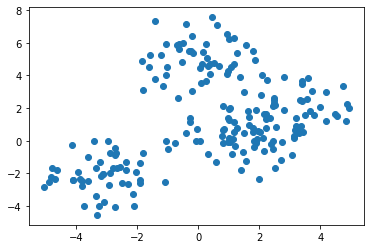

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

x,y_true = make_blobs(n_samples = 200, n_features = 2, centers = [[-3,-2],[0,5],[1,0],[3,2]])

plt.scatter(x[:,0],x[:,1])
plt.show()

接下来我们使用`KMeans()`方法对数据点进行聚类，可视化聚类结果，并标出聚类中心。

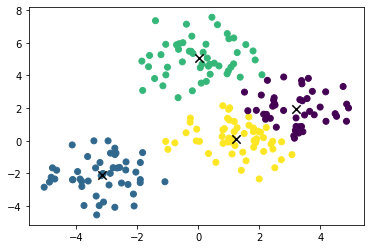

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(x)
y_pre = model.predict(x)
centers = model.cluster_centers_

plt.scatter(x[:,0],x[:,1],c=y_pre)
plt.scatter(centers[:,0],centers[:,1],s=70,color='black',marker='x')
plt.show()

我们看一下如果将数据点分为3簇，聚类效果是怎么样的：

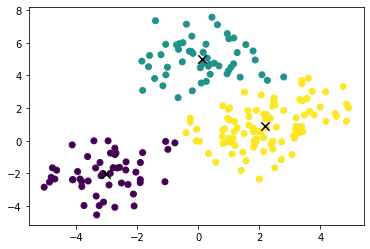

In [20]:
model_2 = KMeans(n_clusters=3)
model_2.fit(x)
y_pre_2 = model_2.predict(x)
centers_2 = model_2.cluster_centers_

plt.scatter(x[:,0],x[:,1],c=y_pre_2)
plt.scatter(centers_2[:,0],centers_2[:,1],s=70,color='black',marker='x')
plt.show()

k-均值算法实现简易，对于小规模数据的聚类效果良好，对于大规模的数据可以保证较好的伸缩性和效率。

但是k值是一个超参数，需要用户给定；并且算法对初始的聚类中心是敏感的，如果数据中含有异常点（孤立点），对模型的影响比较大。

![k-means-dis](img/Lab13-1-2.png)

针对上述问题，人们也提出了二分K-均值算法、K-Means++算法，也提出了谱聚类等高级聚类算法。